In [3]:
from data_wiz import *
from mplfonts.bin.cli import init
from mplfonts import use_font

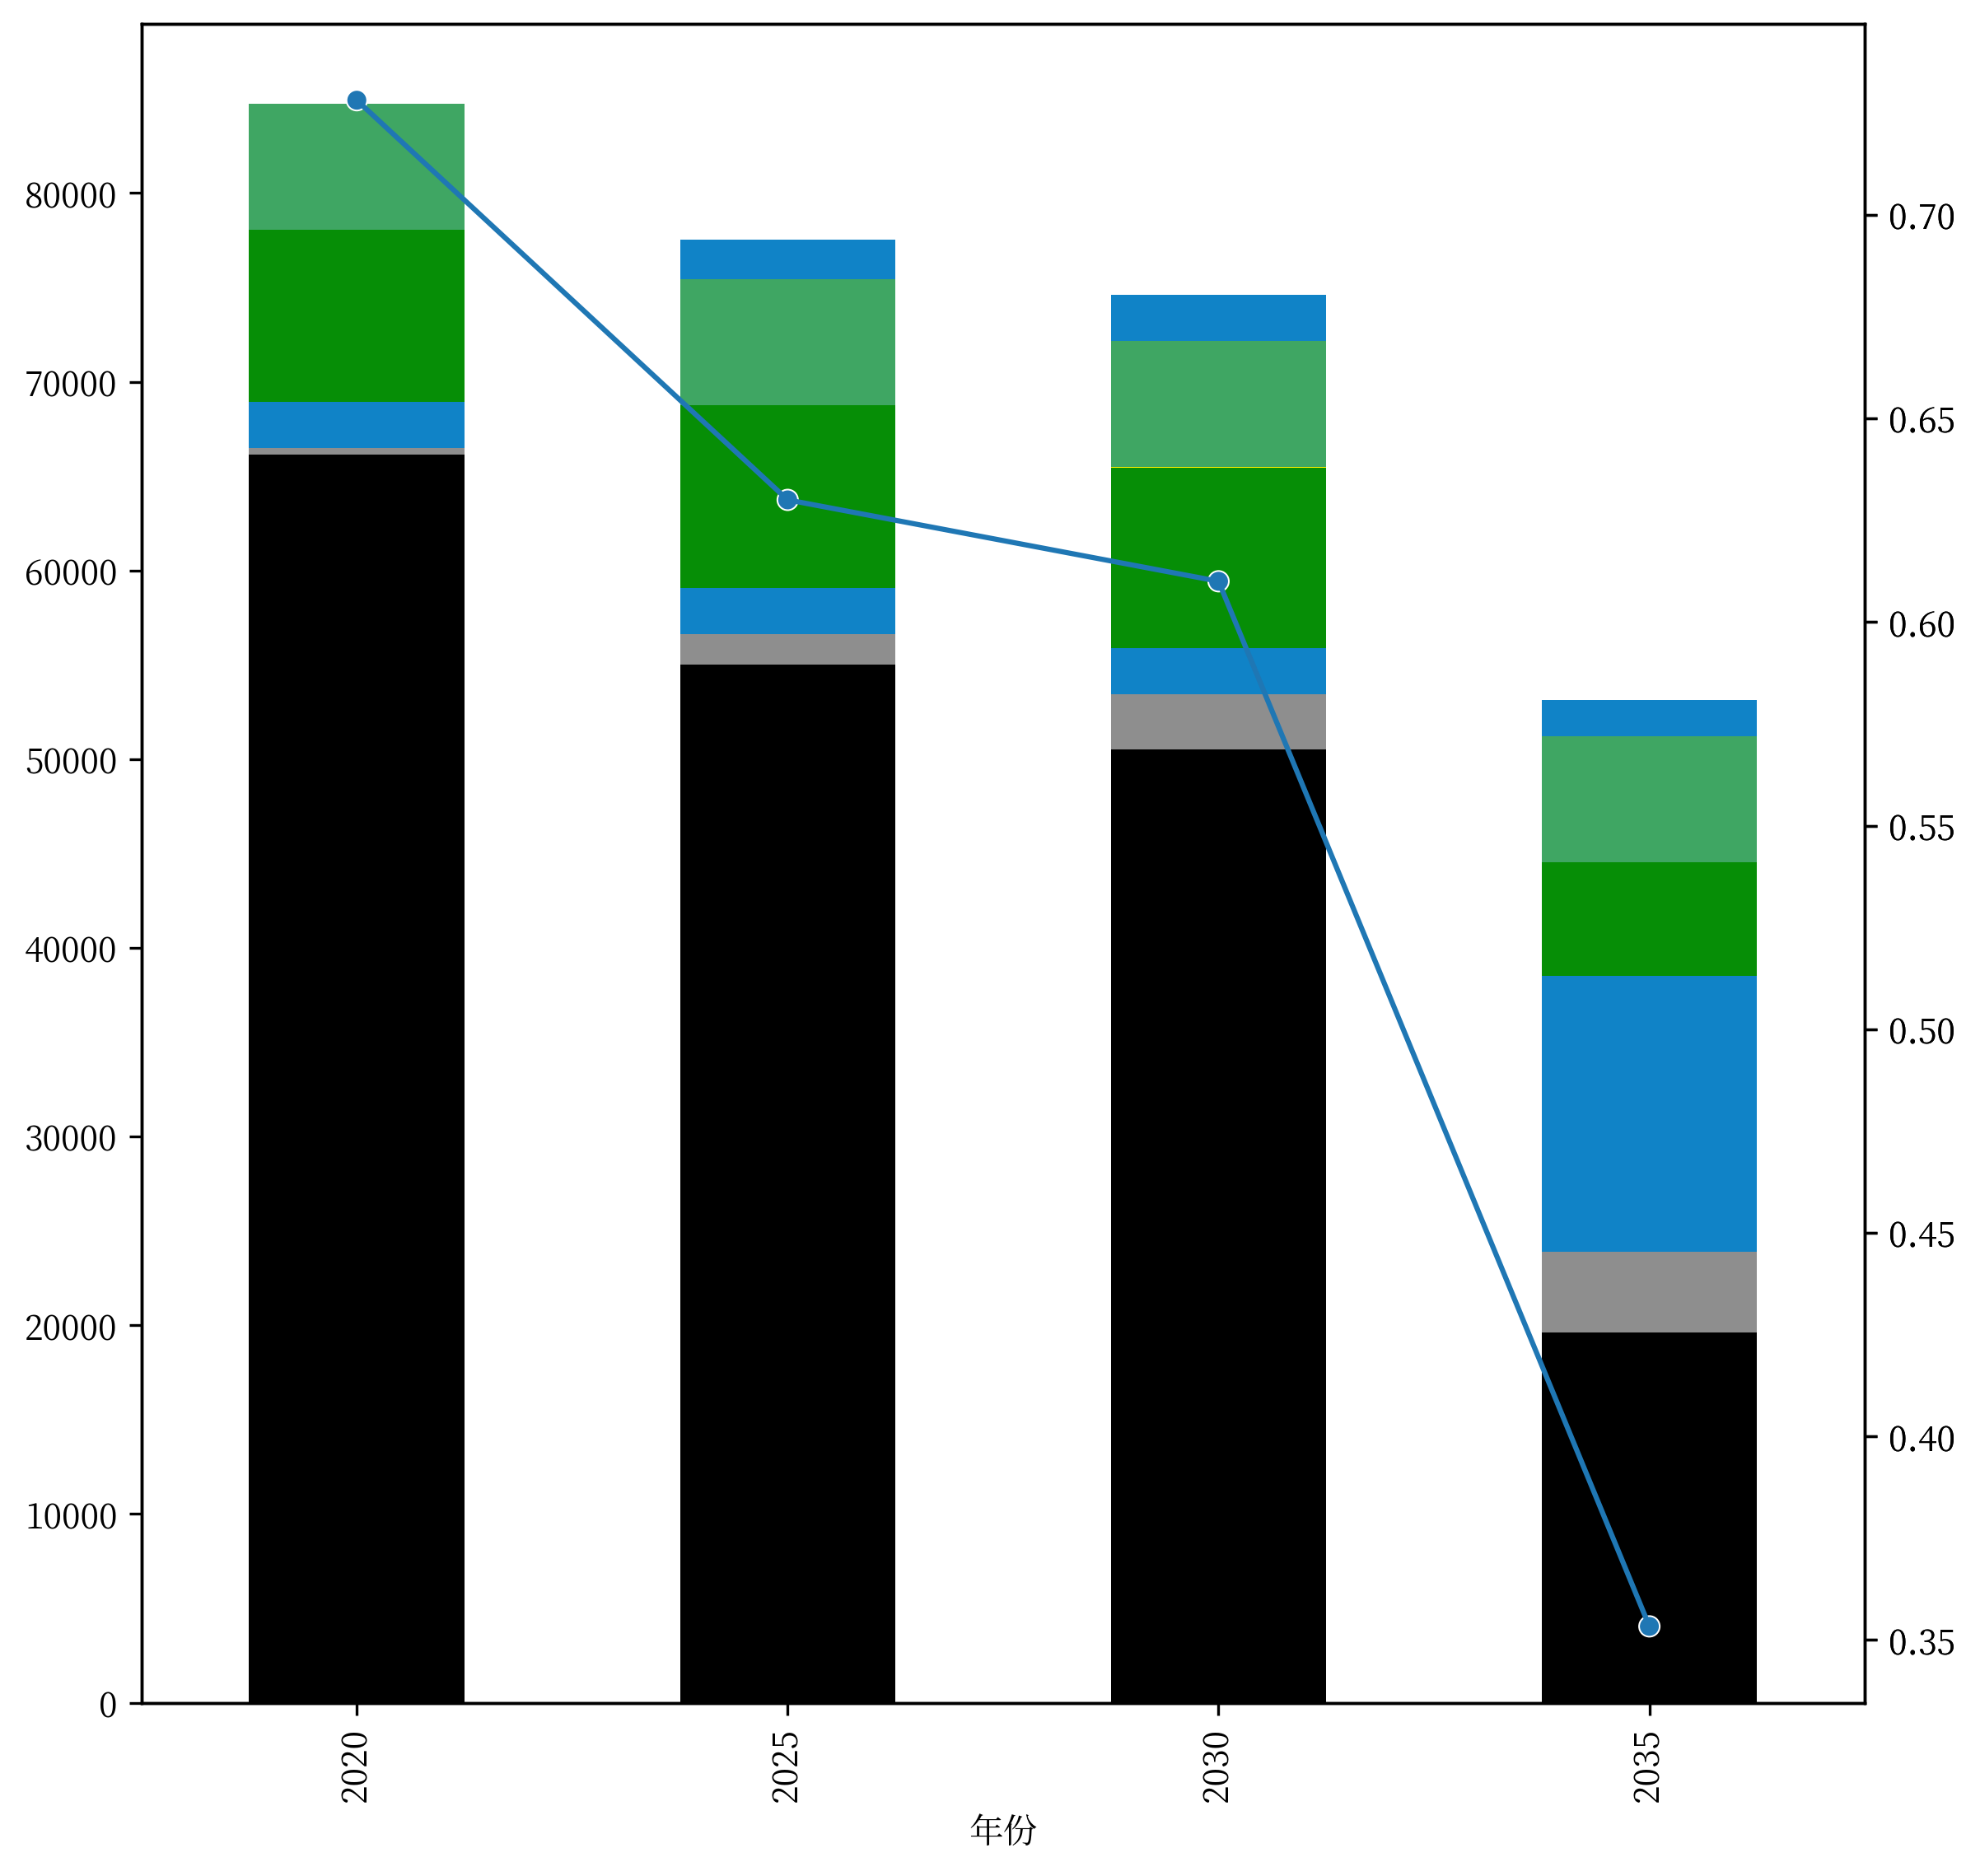

In [8]:
file_index_list = [
    {
        "path": "/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/情景1排放.xlsx",
        "focused_index": "CO2 Emissions (kilotons)",
        "columns": ["CO2 Emissions (kilotons)", "NOX Emissions (tons)", "SO2 Emissions (tons)", "CO2 Emissions from G&B H2 Production (kilotons)", "CO2 Emissions from COG H2 Production (kilotons)", "CO2 Emissions from H2 Production (kilotons)"]
    },
    {
        "path": "/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/情景1产量.xlsx",
        "focused_index": "Electricity Generation (GWh)",
        "columns": ["Electricity Generation (GWh)", "Planned Curtailment (GWh)", "Hydrogen Production (MWh)",
                    "Hydrogen Production (10000 Ton)", "Heat Generation (TJ)"]
    }
]

ref = RefData("/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/color_index.xlsx")
data = WorkingData(file_index_list, ref)
data.rule_out('省下区域', selected_region=['Heilongjiang_A'], region_select_reverse=False,
              selected_tech_group=['压缩空气储能', '化学储能'], tech_group_select_reverse=False)
data.calc_complex_index('CO2 Emissions (kilotons)', 'Electricity Generation (GWh)', tech_specific=False)
data.draw("Electricity Generation (GWh)", focused_region='Heilongjiang_A', scatter=False)